In [6]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/cdata_final.xlsx')
df.isna().sum()

,0
Question,0
Correct_Code,0
Code_with_Error,0
Type_of_Error,0
Header_and_Main_Declaration,0
Incomprehensible_Code,1
Comprehensible_Code_with_logical_errors,0
Comprehensible_code_with_syntax_errors,2
Correct_code_and_output,0
Final_Marks,0


In [7]:
df = df.fillna(method='pad')

<ipython-input-7-4d7ddb4551e6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [8]:
df = df.iloc[:,4:10]
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks
0,2,2.0,2,2.0,2,10
1,2,2.0,2,2.0,0,8
2,2,2.0,1,1.0,1,7
3,2,1.0,1,1.0,0,5
4,2,2.0,1,1.0,0,6
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,1
1172,2,2.0,2,1.0,1,8
1173,2,0.0,0,0.0,0,2
1174,2,2.0,1,2.0,1,8


In [9]:
target = []
for val in df['Final_Marks']:
    if val < 5:
        target.append(0)
    else:
        target.append(1)
df['Target'] = target
df.drop('Final_Marks', axis = 1)

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Target
0,2,2.0,2,2.0,2,1
1,2,2.0,2,2.0,0,1
2,2,2.0,1,1.0,1,1
3,2,1.0,1,1.0,0,1
4,2,2.0,1,1.0,0,1
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,0
1172,2,2.0,2,1.0,1,1
1173,2,0.0,0,0.0,0,0
1174,2,2.0,1,2.0,1,1


In [10]:
#1

from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

class_report_train = classification_report(y_train, y_train_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

print("\nClassification Report (Training Set):")
print(class_report_train)

print("\nClassification Report (Test Set):")
print(class_report_test)

Confusion Matrix (Training Set):
[[272   0]
 [  0 551]]

Confusion Matrix (Test Set):
[[119   0]
 [  0 234]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       551

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       234

    accuracy                           1.00       353
   macro avg       1.00      1.00      1.00       353
weighted avg       1.00      1.00      1.00       353



In [29]:
import numpy as np
import pandas as pd

# Read the Excel file and load the required columns
df_purchase = pd.read_excel("/content/cdata_final.xlsx", sheet_name=0, usecols='A:E')

# Extract the necessary columns into variables A and C
A = df_purchase.iloc[:, 1:4]
C = df_purchase.iloc[:, 4]

# Convert categorical data in A into numeric form using one-hot encoding
A_encoded = pd.get_dummies(A)

# Print the transformed DataFrame
print("Encoded matrix A:")
print(A_encoded.head())

# Now that A is numeric, you can perform matrix operations
# Print dimensionality of the vector space and the number of vectors
print("Dimensionality of the vector space:", df_purchase.shape)
print("Number of vectors:", A_encoded.shape[0])

# Calculate and print the rank of the encoded matrix A
print("Rank of matrix A:", np.linalg.matrix_rank(A_encoded))

# Compute the pseudoinverse of the encoded matrix A
A_inv = np.linalg.pinv(A_encoded)

# Compute the price of each item (using the pseudoinverse and C)
price_of_each_item = A_inv @ C
print("Price of each item:", price_of_each_item)

# Predict the values of C using the computed prices
y_pred = A_encoded @ price_of_each_item

# Compute the evaluation metrics
y = C
MSE = np.square(np.subtract(y, y_pred)).mean()
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100
R2 = 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

# Print the evaluation metrics
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)


Encoded matrix A:
   Correct_Code_#include <stdio.h>\n\n#define ASCII_SIZE 128\n\nvoid getMaxOccurringChar(char *str, char *maxChars, int *maxCount) {\nint count[ASCII_SIZE] = {0}; \n*maxCount = 0; \n\n\nfor (int i = 0; str[i] != '\0'; i++) {\ncount[str[i]]++;\nif (count[str[i]] > *maxCount) {\n*maxCount = count[str[i]];\n}\n}\n\n\nint j = 0;\nfor (int i = 0; i < ASCII_SIZE; i++) {\nif (count[i] == *maxCount) {\nmaxChars[j++] = i;\n}\n}\n\nmaxChars[j] = '\0'; \n}\n\nint main() {\nchar str[100];\nprintf("Enter a string: ");\nfgets(str, sizeof(str), stdin);\n\nchar maxChars[ASCII_SIZE];\nint maxCount;\n\ngetMaxOccurringChar(str, maxChars, &maxCount);\n\n  \
0                                              False                                                                                                                                                                                                                                                                                            

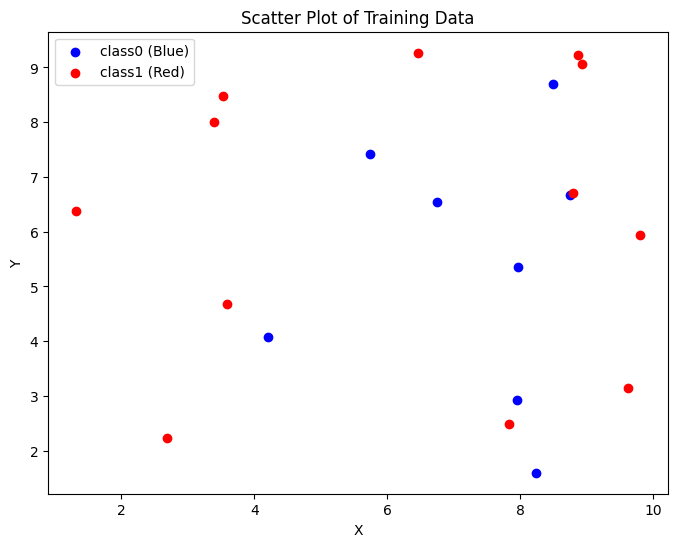

           X         Y   Class
0   7.961849  5.359728  class0
1   3.394398  8.002065  class1
2   8.932929  9.071927  class1
3   8.749190  6.672182  class0
4   9.797769  5.939388  class1
5   6.753533  6.548951  class0
6   8.236661  1.595812  class0
7   5.734661  7.418970  class0
8   2.694718  2.234148  class1
9   7.949113  2.925766  class0
10  8.793609  6.715544  class1
11  6.455880  9.269364  class1
12  4.203351  4.074925  class0
13  8.497565  8.698107  class0
14  7.832421  2.486159  class1
15  3.523211  8.485339  class1
16  9.616612  3.151433  class1
17  8.867807  9.227673  class1
18  3.584323  4.673033  class1
19  1.325375  6.384767  class1


In [14]:
#3q)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 20 random data points for X and Y, with values ranging between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign these points to two different classes randomly
classes = np.random.choice(['class0', 'class1'], size=20)

# Create a DataFrame with X, Y, and Class columns
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Separate the points based on their class
X_class0 = df[df['Class'] == 'class0']['X']
Y_class0 = df[df['Class'] == 'class0']['Y']
X_class1 = df[df['Class'] == 'class1']['X']
Y_class1 = df[df['Class'] == 'class1']['Y']

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_class0, Y_class0, c='blue', label='class0 (Blue)')
plt.scatter(X_class1, Y_class1, c='red', label='class1 (Red)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

plt.legend(loc='best')

plt.show()

# Display the DataFrame
print(df)


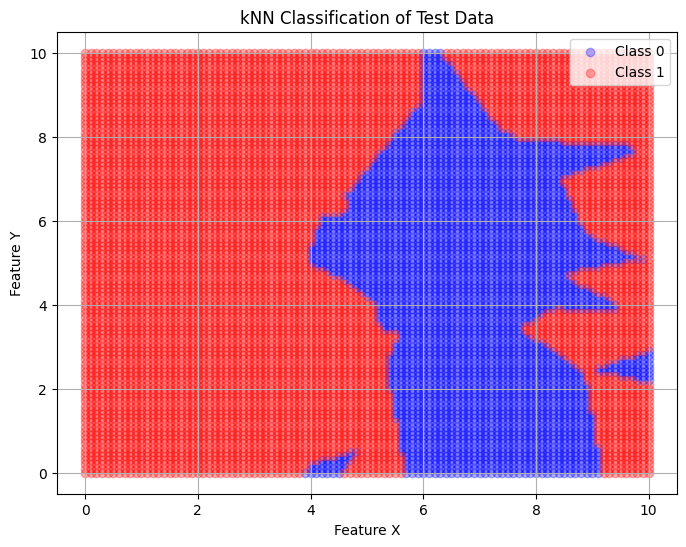

In [15]:
#4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['X', 'Y']], df['Class'])

test_data['Class'] = knn.predict(test_data[['X', 'Y']])

plt.figure(figsize=(8, 6))
plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)

plt.show()


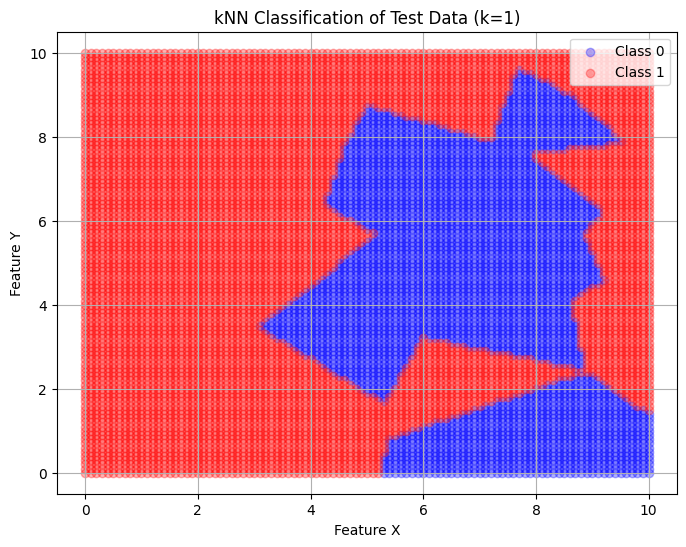

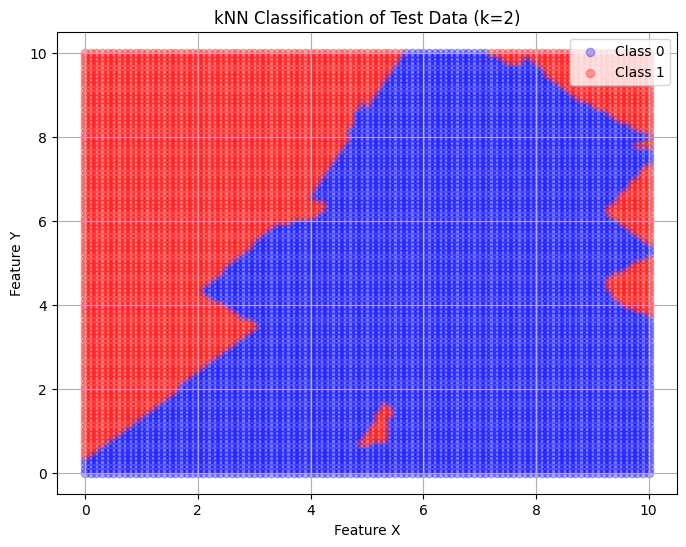

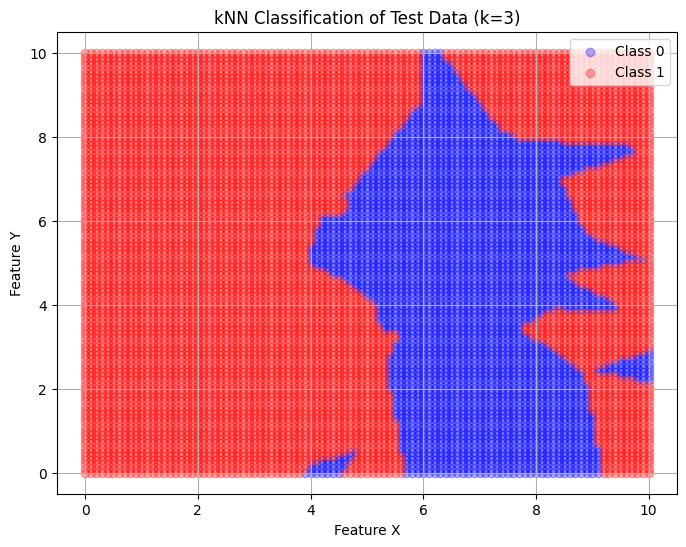

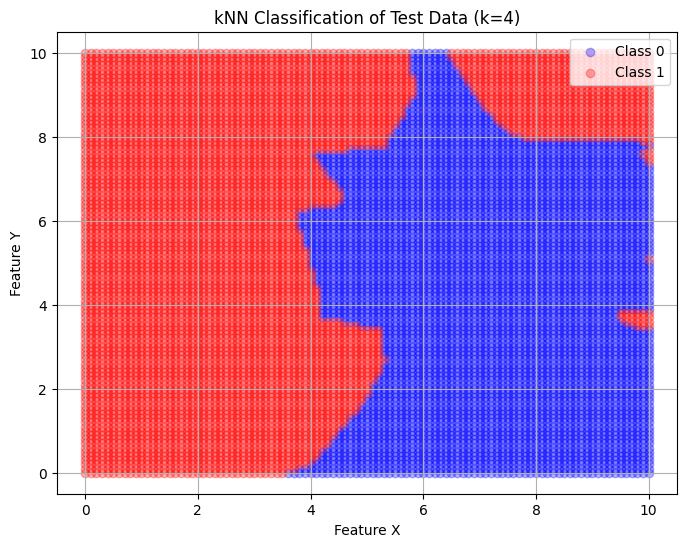

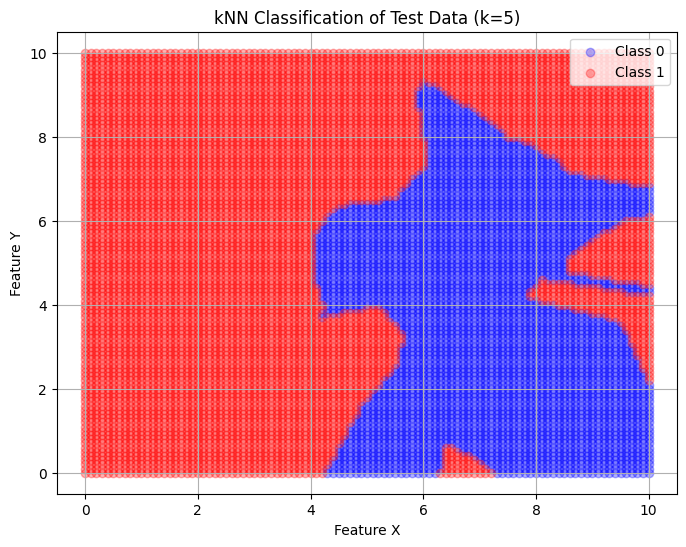

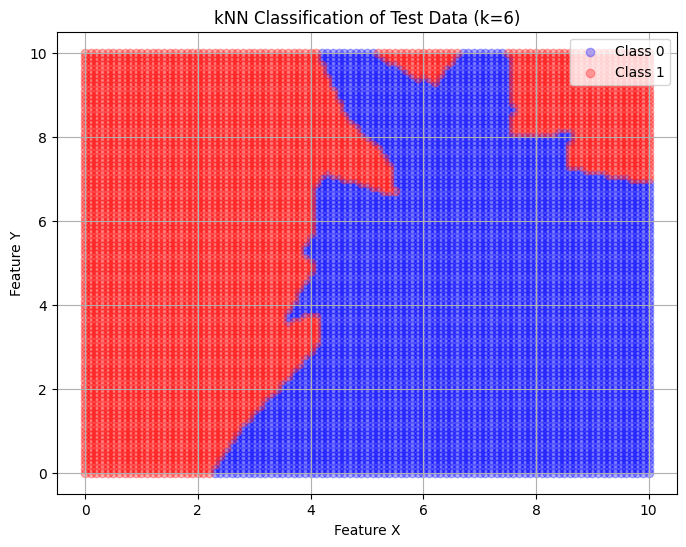

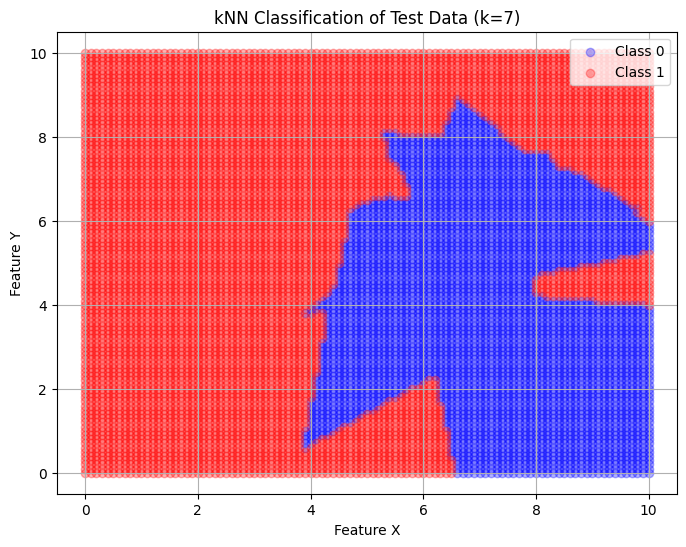

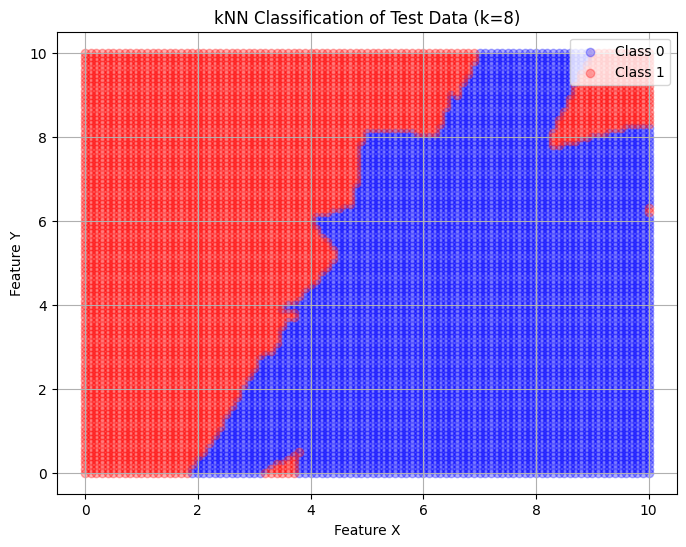

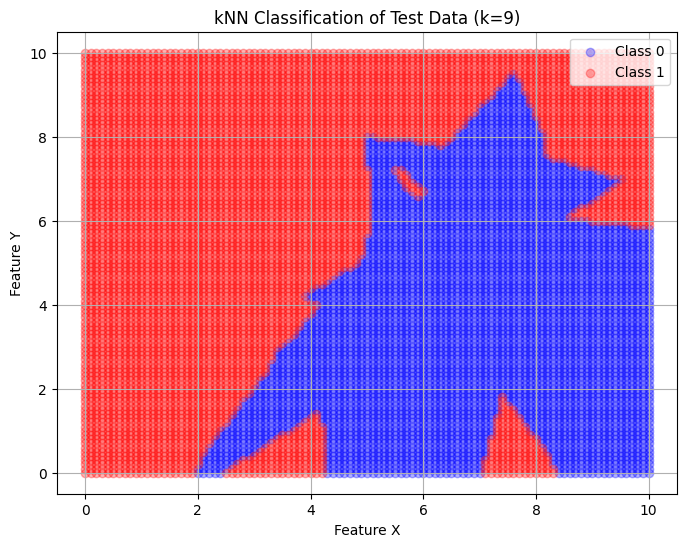

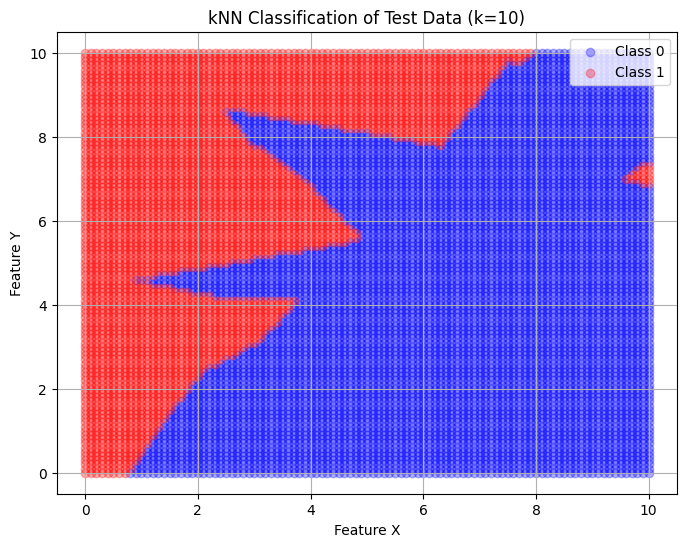

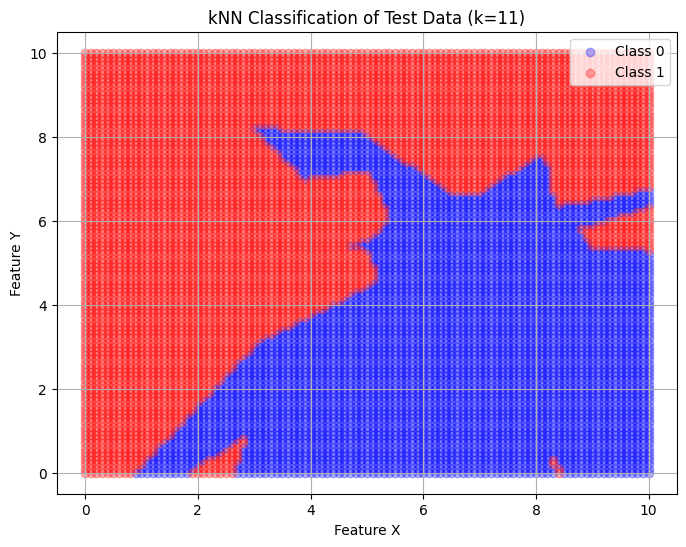

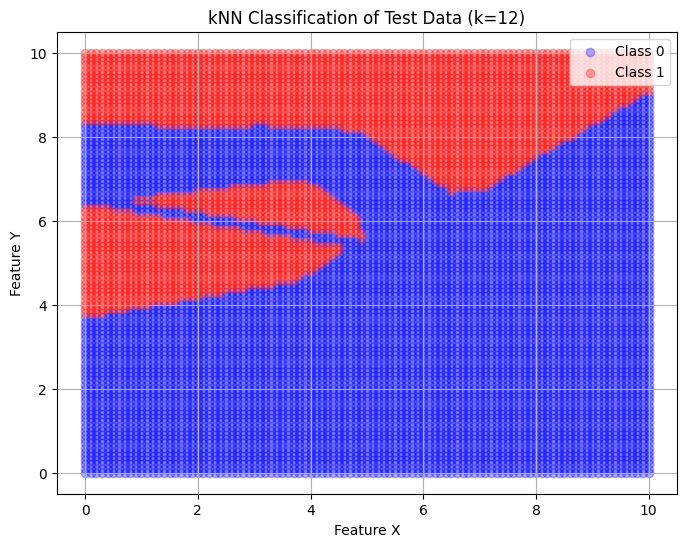

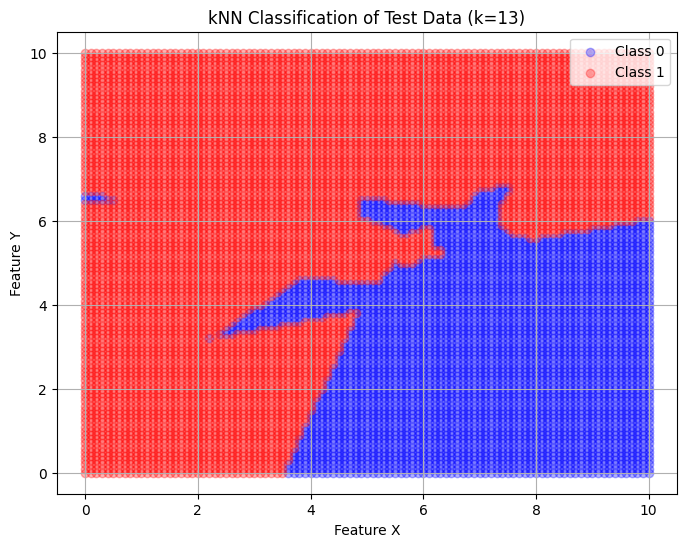

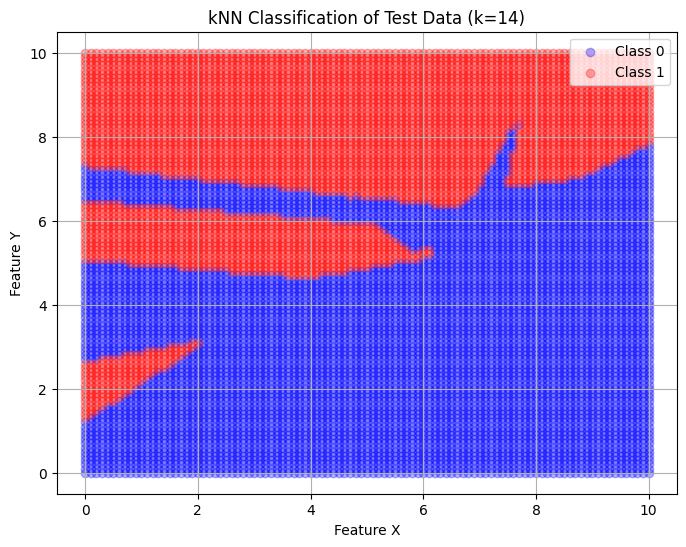

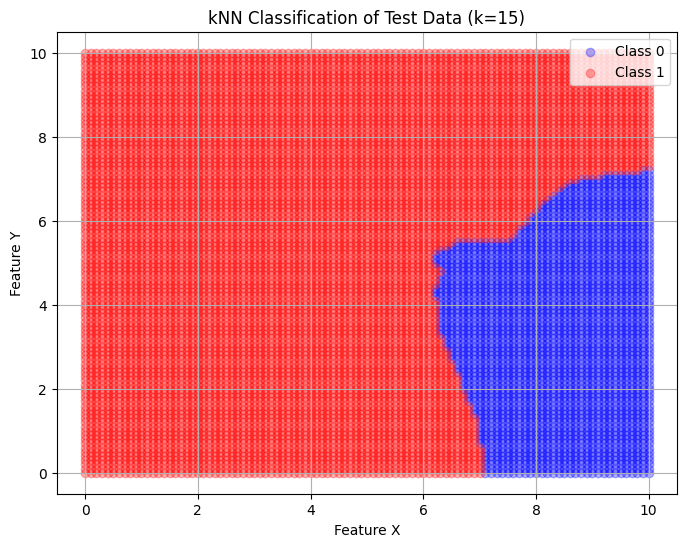

In [16]:
#5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['X', 'Y']], df['Class'])

    test_data['Class'] = knn.predict(test_data[['X', 'Y']])

    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()


<ipython-input-18-0059fb792520>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


Question                                   0
Correct_Code                               0
Code_with_Error                            0
Type_of_Error                              0
Header_and_Main_Declaration                0
Incomprehensible_Code                      0
Comprehensible_Code_with_logical_errors    0
Comprehensible_code_with_syntax_errors     0
Correct_code_and_output                    0
Final_Marks                                0
code_processed                             0
code_with_question                         0
code_comment                               0
code_with_solution                         0
ast                                        0
dtype: int64


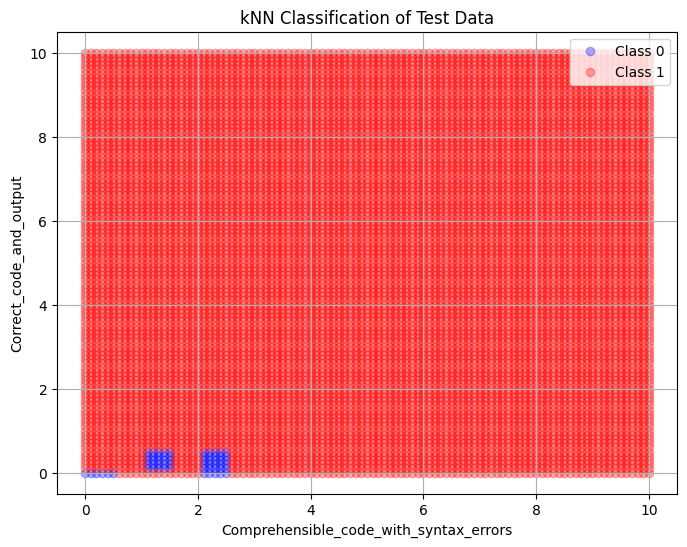

In [18]:
#6
df = pd.read_excel('/content/cdata_final.xlsx')
df = df.fillna(method='pad')

print(df.isna().sum())

df = df.iloc[:, 4:10]
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target
df = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output','Target']]

X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'Comprehensible_code_with_syntax_errors': X_test.ravel(),
    'Correct_code_and_output': Y_test.ravel()
})

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])
test_data['Class'] = knn.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

plt.figure(figsize=(8, 6))
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
            test_data['Correct_code_and_output'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
            test_data['Correct_code_and_output'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('Comprehensible_code_with_syntax_errors')
plt.ylabel('Correct_code_and_output')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()

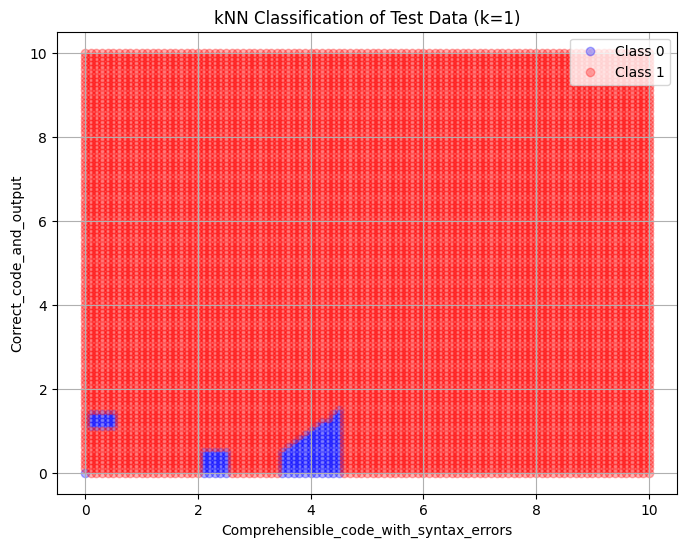

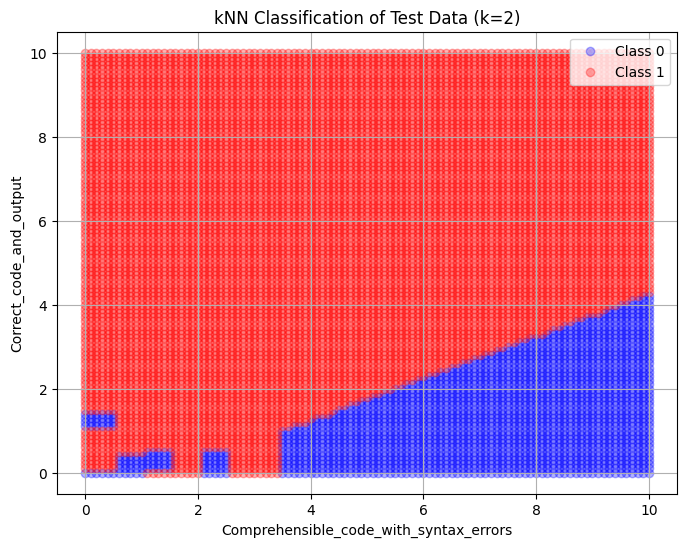

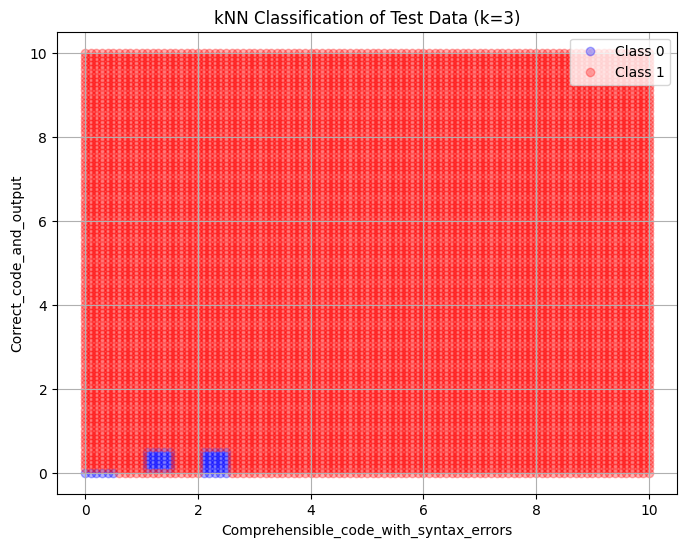

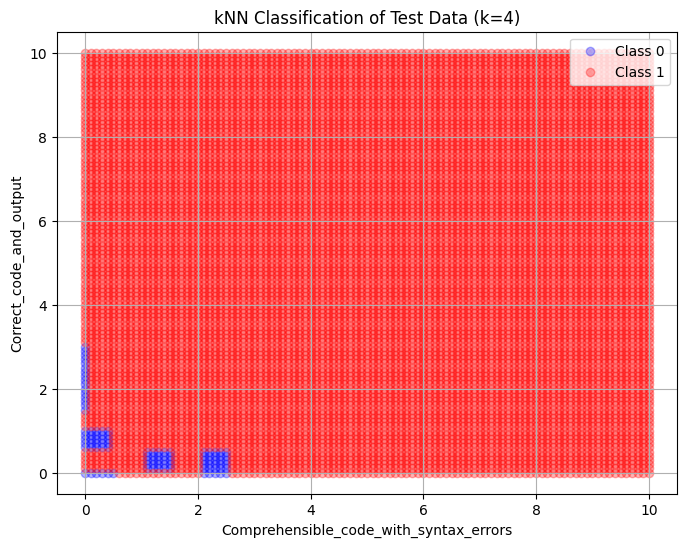

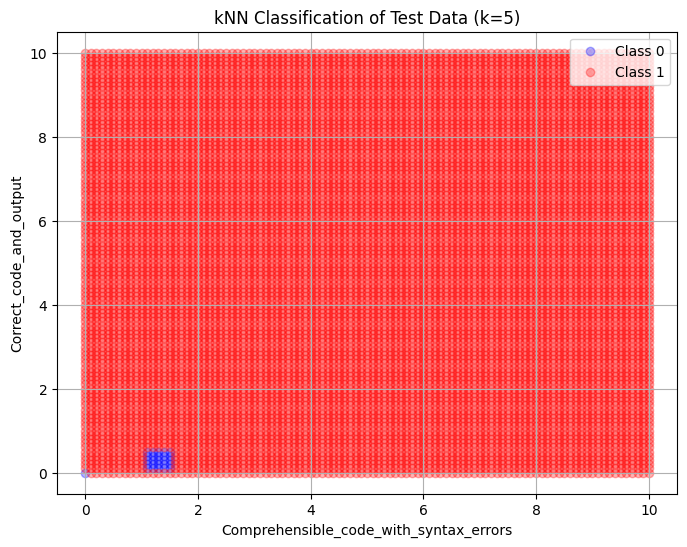

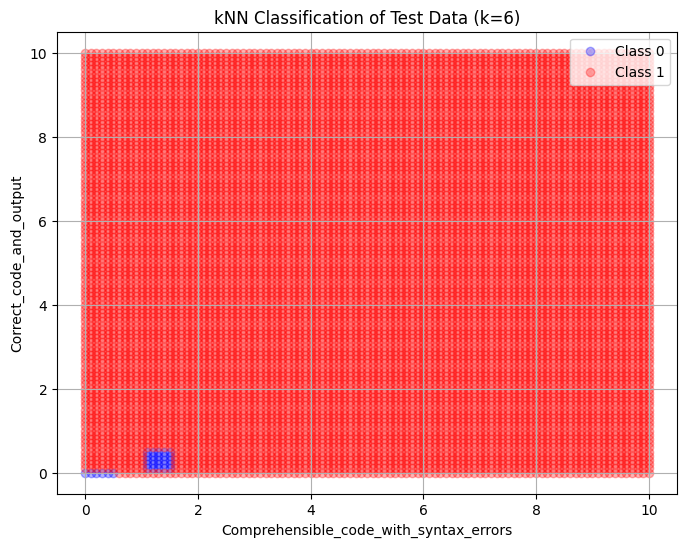

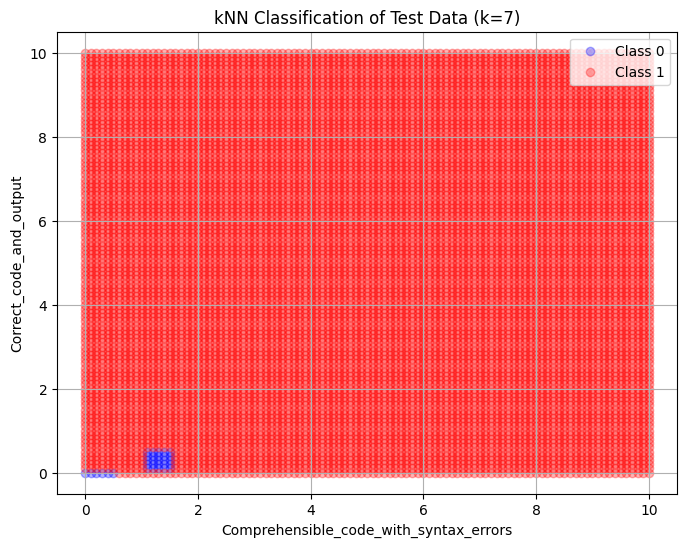

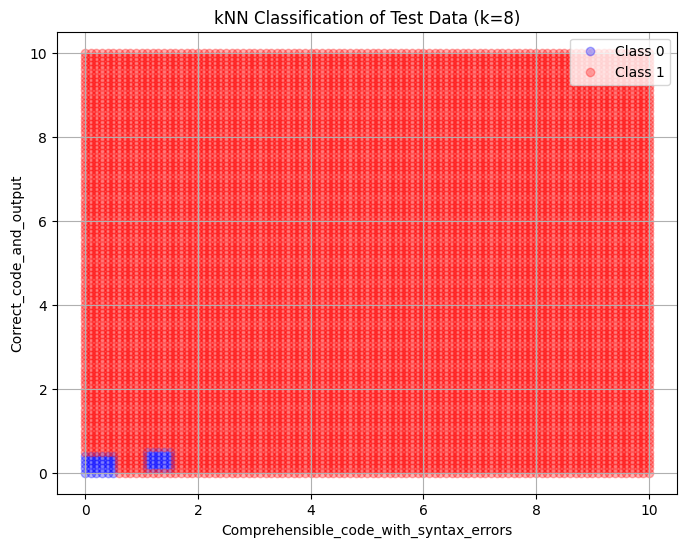

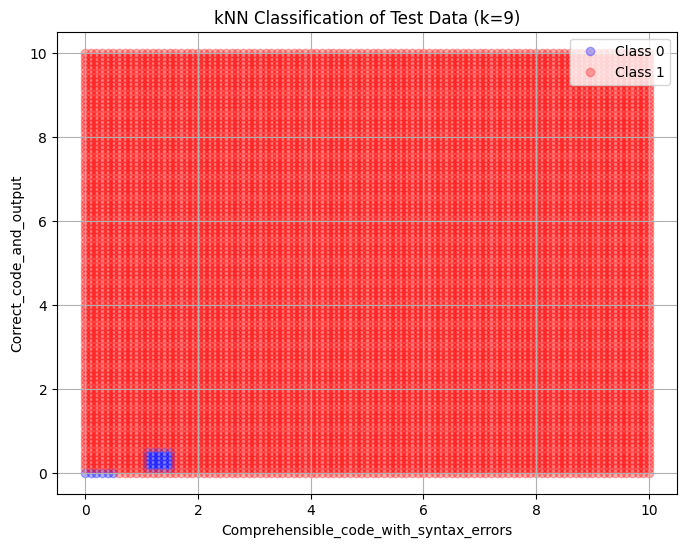

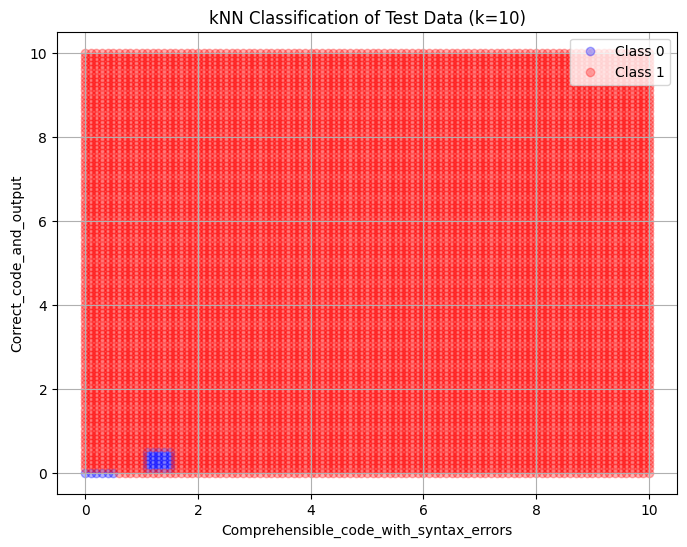

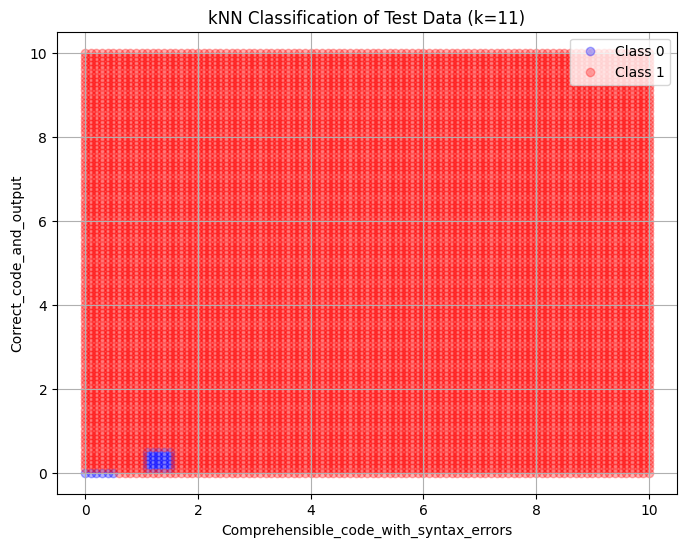

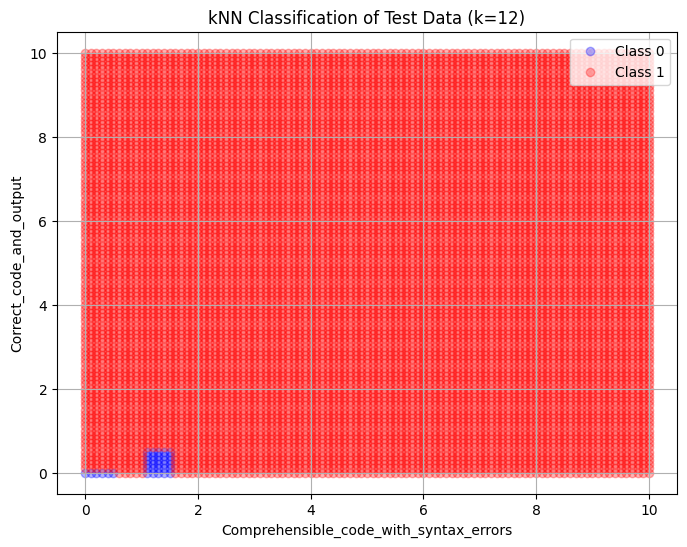

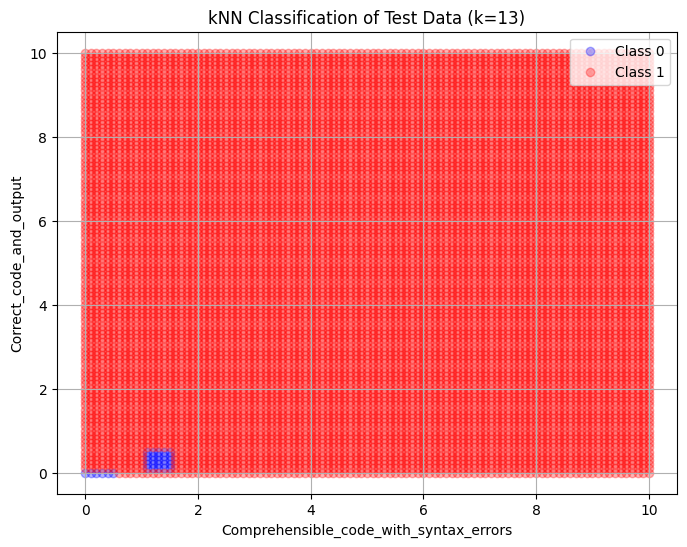

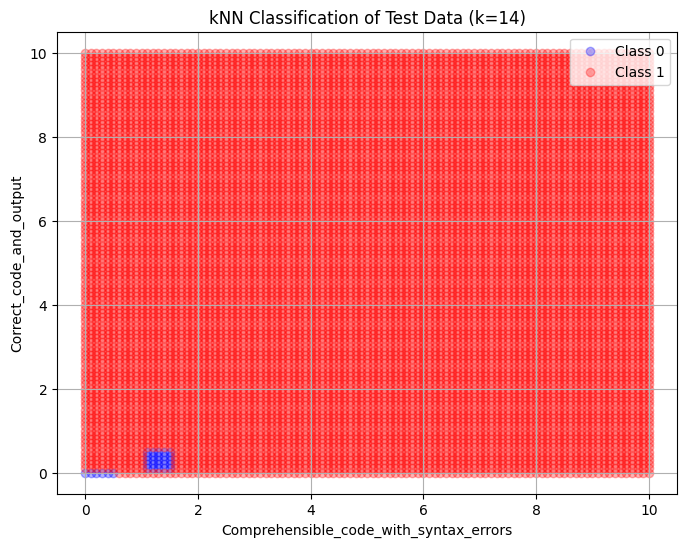

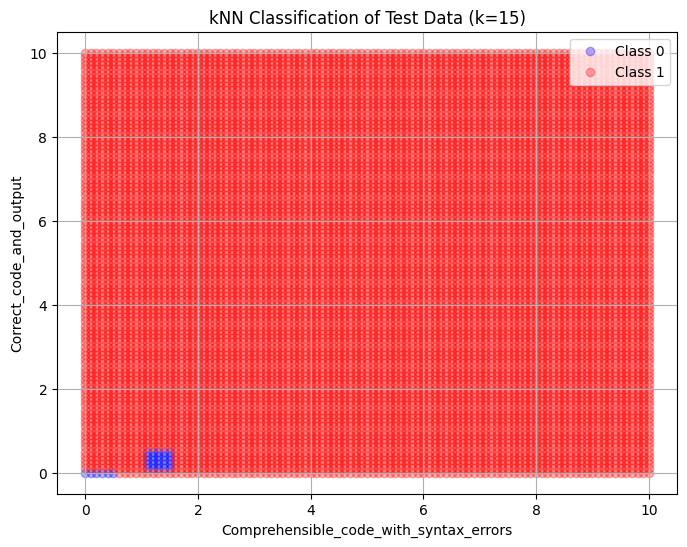

In [19]:
#5
df = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output','Target']]

X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'Comprehensible_code_with_syntax_errors': X_test.ravel(),
    'Correct_code_and_output': Y_test.ravel()
})

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])

    test_data['Class'] = knn.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
                test_data['Correct_code_and_output'][test_data['Class'] == 0],
                color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
                test_data['Correct_code_and_output'][test_data['Class'] == 1],
                color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Comprehensible_code_with_syntax_errors')
    plt.ylabel('Correct_code_and_output')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()

In [20]:
#q7)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


df = pd.read_excel('/content/cdata_final.xlsx')
df = df.fillna(method='pad')

df = df.iloc[:, 4:10]
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target

X = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']]
y = df['Target']

param_grid = {'n_neighbors': range(1, 8)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")



<ipython-input-20-f341659303f5>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


Best k value: 7
Best cross-validation accuracy: 0.7348
